In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

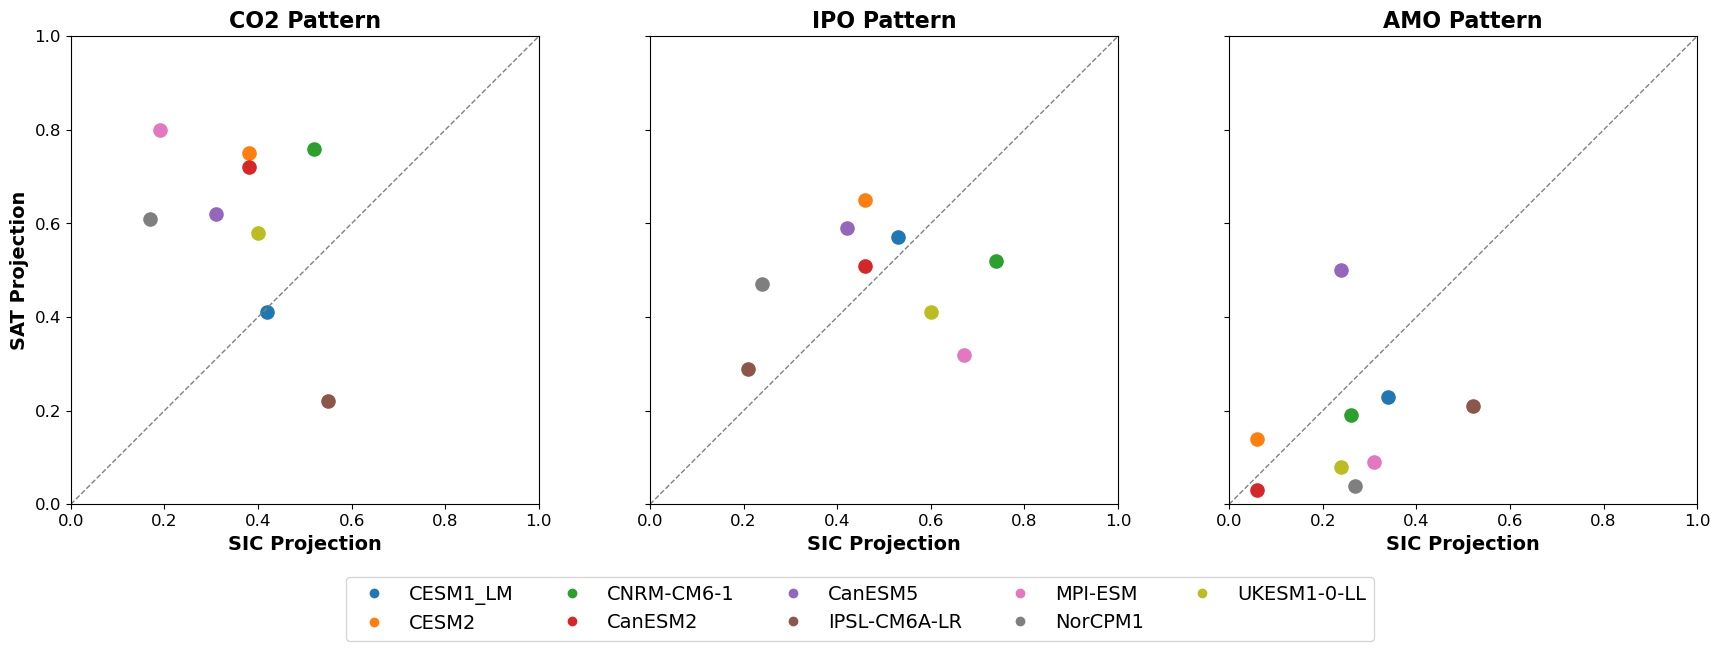

In [2]:
# === Configurable style settings ===
label_fontsize = 14
label_fontweight = 'bold'
legend_fontsize = 14
title_fontsize = 16
dpi = 600

file_path = "Model_Comparison_Cosine_Projection_Resuls.csv"  
df = pd.read_csv(file_path)

# Unique models and assign distinct colors
unique_models = df["Model"].unique()
palette = sns.color_palette("tab10", len(unique_models))
model_colors = dict(zip(unique_models, palette))

# Set up figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
#fig.suptitle("Model Similarity to ERA5 (SIC / SAT)", fontsize=title_fontsize, fontweight='bold')

# Loop over patterns
for i, pattern in enumerate(["CO2", "IPO", "AMO"]):
    ax = axes[i]
    subset = df[df["Pattern"] == pattern]

    # Scatter each model with its color
    for _, row in subset.iterrows():
        ax.scatter(row["SIC"], row["SAT"], s=90,
                   color=model_colors[row["Model"]])

    # Reference diagonal y = x
    ax.plot([0, 1.1], [0, 1.1], linestyle='--', color='gray', linewidth=1)

    # Axes formatting
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_title(f"{pattern} Pattern", fontsize=title_fontsize, fontweight=label_fontweight)
    ax.set_xlabel("SIC Projection", fontsize=label_fontsize, fontweight=label_fontweight)
    if i == 0:
        ax.set_ylabel("SAT Projection", fontsize=label_fontsize, fontweight=label_fontweight)
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='both', labelsize=label_fontsize - 2)
    ax.set_frame_on(True)

# Build custom legend
handles = [plt.Line2D([0], [0], marker='o', linestyle='',
                      color=model_colors[model], label=model)
           for model in unique_models]

fig.legend(handles=handles,
           loc='lower center',
           ncol=5,
           bbox_to_anchor=(0.5, -0.10),
           fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])

# Save the figure
fig.savefig("Supplementary_Figure_9.jpg", dpi=dpi, bbox_inches='tight')
#fig.savefig("Model_Similarity_Projections.pdf", dpi=dpi, bbox_inches='tight')

plt.show()